In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

#for interactivity 
from ipywidgets import interact
from tabulate import tabulate

data=pd.read_csv('crop_recommendation.csv')
print("Shape Of The Data:",data.shape)
print()
data.head()
data.tail()
data.columns
data.dtypes
data['label'].unique()
data['label'].value_counts()
data.isnull().sum()

#summary of dataset

# create a list of variable names
variables = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# loop through the variables and calculate/print their mean values
for var in variables:
    print("Average ratio of {0} in the soil: {1:.2f}".format(var, data[var].mean()))

@interact(crops=data['label'].unique())
def summary(crops):
    stats = ['mean', 'median', 'min', 'max']
    vars = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

    print("Statistics for crop:", crops)
    for var in vars:
        print("Statistics of", var)
        print("Statistics for crop:", crops)
        for stat in stats:
            print(stat, var, "required: {:.2f}".format(data[data['label'] == crops][var].agg(stat)))
        print()  # Add an empty print statement to print a blank line

@interact
def compare(conditions =['N','P','K','temperature','humidity','rainfall','ph']):
    crops = ['rice', 'maize', 'jute', 'blackgram', 'banana', 'coconut', 'apple', 'papaya', 'muskmelon', 'grapes', 'watermelon', 'kidneybeans', 'mungbean', 'orange', 'chickpea', 'lentil', 'cotton', 'pigeonpeas', 'mothbeans', 'mango', 'pomegranate', 'coffee']
    for crop in crops:
        print("{}: {:.2f}".format(crop.title(), data[data['label'] == crop][conditions].mean()))

@interact
def compare(conditions =['N','P','K','temperature','humidity','rainfall','ph']):
    print("crops which requires greater than the average",conditions,'\n')
    print(data[data[conditions]>data[conditions].mean()]['label'].unique())
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("crops which require less than average ", conditions,'\n')
    print(data[data[conditions]<=data[conditions].mean()]['label'].unique())

print("Some interesting facts")
    
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

headers = ['Condition', 'Crops']
data = [
    ['High Nitrogen content in soil', ', '.join(data[data['N']>120]['label'].unique())],
    ['High Phosphorus content in soil', ', '.join(data[data['P']>100]['label'].unique())],
    ['High Potassium content in soil', ', '.join(data[data['K']>200]['label'].unique())],
    ['High Rainfall', ', '.join(data[data['rainfall']>200]['label'].unique())],
    ['Low temperature', ', '.join(data[data['temperature']<10]['label'].unique())],
    ['High temperature', ', '.join(data[data['temperature']>40]['label'].unique())],
    ['Low humidity', ', '.join(data[data['humidity']<20]['label'].unique())],
    ['High PH', ', '.join(data[data['ph']>9]['label'].unique())],
    ['Very low PH', ', '.join(data[data['ph']<4]['label'].unique())]
]

print(tabulate(data, headers=headers))



Shape Of The Data: (2200, 8)

Average ratio of N in the soil: 50.55
Average ratio of P in the soil: 53.36
Average ratio of K in the soil: 48.15
Average ratio of temperature in the soil: 25.62
Average ratio of humidity in the soil: 71.48
Average ratio of ph in the soil: 6.47
Average ratio of rainfall in the soil: 103.46


interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'chickpea', 'kidneybeans', 'pige…

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'r…

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'r…

Some interesting facts
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Condition                        Crops
-------------------------------  ---------------------
High Nitrogen content in soil    cotton
High Phosphorus content in soil  grapes, apple
High Potassium content in soil   grapes, apple
High Rainfall                    rice, papaya, coconut
Low temperature                  grapes
High temperature                 grapes, papaya
Low humidity                     chickpea, kidneybeans
High PH                          mothbeans
Very low PH                      mothbeans


(2200, 7)


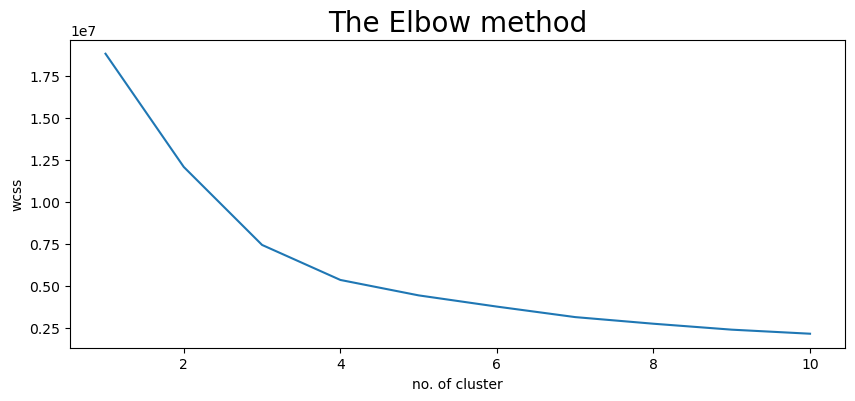

crops in first cluster : ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
crops in second cluster : ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
crops in third cluster : ['grapes' 'apple']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
crops in forth cluster : ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore')

data=pd.read_csv('crop_recommendation.csv')
x=data.loc[:,['N','P','K','temperature','humidity','rainfall','ph']].values
print(x.shape)

x_data=pd.DataFrame(x)
x_data.head()

plt.rcParams['figure.figsize']=(10,4)

wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The Elbow method',fontsize=20)
plt.xlabel('no. of cluster')
plt.ylabel('wcss')
plt.show()

km=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means=km.fit_predict(x)

a=data['label']
y_means=pd.DataFrame(y_means)
z=pd.concat([y_means,a],axis=1)
z=z.rename(columns={0:'cluster'})

#check cluster for each group
print("crops in first cluster :",z[z['cluster']==0]['label'].unique())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("crops in second cluster :",z[z['cluster']==1]['label'].unique())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("crops in third cluster :",z[z['cluster']==2]['label'].unique())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("crops in forth cluster :",z[z['cluster']==3]['label'].unique())


shape of x (2200, 7)
shape of y (2200,)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1

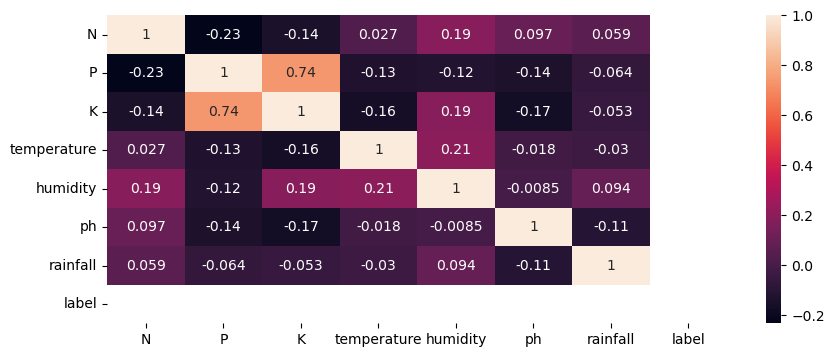

In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd

data=pd.read_csv('crop_recommendation.csv')

x=data.drop(['label'],axis=1)
y=data['label']

print("shape of x",x.shape)
print("shape of y",y.shape)
print()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

from sklearn.metrics import classification_report 
cr=classification_report (y_test,y_pred)
print(cr)

Prediction=model.predict((np.array([[90,40,40,20,80,7,200]])))
print("the suggested crop for this given climate condition is ",Prediction)

Prediction=model.predict((np.array([[20,30,10,15,90,7.5,100]])))
print("the suggested crop for this given climate condition is ",Prediction)
print()

# convert any non-numeric columns to numeric
for col in data.columns:
    if data[col].dtype == object:
        data[col] = pd.to_numeric(data[col], errors='coerce')

sns.heatmap(data.corr(),annot=True)

features = data[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = data['label']

#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = data['label']

# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []


In [4]:
#Decision Tree
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

data = pd.read_csv("crop_recommendation.csv")

X = data.drop(['label'], axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_test)

dt_acc = accuracy_score(y_test, y_pred)
print("Accuracy of Decision Tree:", dt_acc*100)

cv_score = cross_val_score(dt_clf, X, y, cv=5)
print("Cross-validation score:", cv_score)
print()

print(classification_report(y_test,y_pred))

#Saving trained Decision Tree model

import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'

# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTreeClassifier, DT_Model_pkl)

# Close the pickle instances
DT_Model_pkl.close()

Accuracy of Decision Tree: 98.18181818181819
Cross-validation score: [0.99090909 0.98409091 0.99318182 0.98863636 0.98409091]

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.91      0.87      0.89        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       0.95      1.00      0.97        19
   muskm

In [5]:
# Guassian Naive Bayes
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

data = pd.read_csv("crop_recommendation.csv")

X = data.drop(['label'], axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

y_pred = nb_clf.predict(X_test)

nb_acc = accuracy_score(y_test, y_pred)
print("Accuracy of Naive Bayes:", nb_acc*100)

cv_score = cross_val_score(nb_clf, X, y, cv=5)
print("Cross-validation score:", cv_score)
print()

print(classification_report(y_test,y_pred))

#Saving trained Guassian Naive Bayes model
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'

# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(GaussianNB, NB_Model_pkl)

# Close the pickle instances
NB_Model_pkl.close()

Accuracy of Naive Bayes: 99.54545454545455
Cross-validation score: [0.99772727 0.99545455 0.99545455 0.99545455 0.99090909]

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmel

In [6]:
# Support Vector Machine (SVM)
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

data = pd.read_csv("crop_recommendation.csv")

X = data.drop(['label'], axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

svm_acc = accuracy_score(y_test, y_pred)
print("Accuracy of SVM:", svm_acc*100)

cv_score = cross_val_score(svm_clf, X, y, cv=5)
print("Cross-validation score:", cv_score)
print()

print(classification_report(y_test,y_pred))

#Saving trained SVM model
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = 'SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVC, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()


Accuracy of SVM: 97.95454545454545
Cross-validation score: [0.98181818 0.98863636 0.98863636 0.98181818 0.98409091]

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.87      0.87      0.87        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      0.95      0.98        21
       mango       0.95      1.00      0.97        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon      

In [7]:
#Logistic Regression
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

data = pd.read_csv("Crop_recommendation.csv")

X = data.drop(['label'], axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_clf = LogisticRegression(random_state=42)
lr_clf.fit(X_train, y_train)

y_pred = lr_clf.predict(X_test)

lr_acc = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression:", lr_acc*100)

cv_score = cross_val_score(lr_clf, X, y, cv=5)
print("Cross-validation score:", cv_score)
print()

print(classification_report(y_test,y_pred))

#Saving trained Logistic Regression model
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogisticRegression, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()


Accuracy of Logistic Regression: 94.54545454545455
Cross-validation score: [0.95       0.96590909 0.94772727 0.96590909 0.94318182]

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       0.95      1.00      0.98        21
   blackgram       0.83      0.75      0.79        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.80      0.94      0.86        17
      grapes       1.00      1.00      1.00        14
        jute       0.91      0.87      0.89        23
 kidneybeans       1.00      0.95      0.97        20
      lentil       0.83      0.91      0.87        11
       maize       0.94      0.76      0.84        21
       mango       0.95      1.00      0.97        19
   mothbeans       0.85      0.92      0.88        24
    mungbean       0.95      1.00      0.97        19
  

In [8]:
#Random Forest
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

data = pd.read_csv("crop_recommendation.csv")

X = data.drop(['label'], axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

rf_acc = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest:", rf_acc*100)

cv_score = cross_val_score(rf_clf, X, y, cv=5)
print("Cross-validation score:", cv_score)
print()

print(classification_report(y_test,y_pred))

#Saving trained Random Forest model
import pickle

# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'

# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RandomForestClassifier, RF_Model_pkl)

# Close the pickle instances
RF_Model_pkl.close()

Accuracy of Random Forest: 99.31818181818181
Cross-validation score: [0.99772727 0.99318182 0.99772727 0.99545455 0.98863636]

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskm

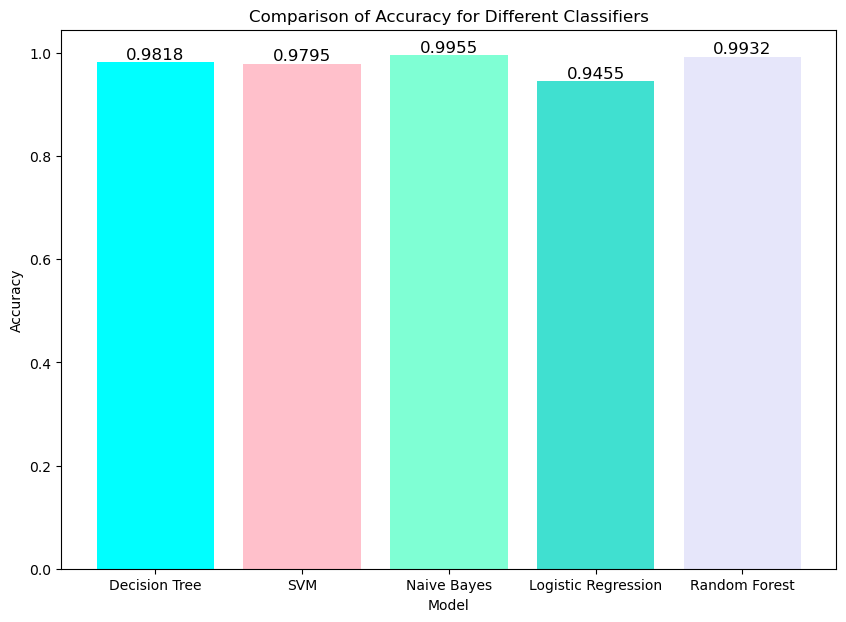

In [9]:
#Accuracy Comparison

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

models = ['Decision Tree', 'SVM', 'Naive Bayes', 'Logistic Regression', 'Random Forest']
accuracies = [dt_acc, svm_acc, nb_acc, lr_acc, rf_acc]

fig, ax = plt.subplots(figsize=(10,7))
colors = ['cyan', 'pink', 'aquamarine', 'turquoise', 'lavender']
bars = ax.bar(models, accuracies, color=colors)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, round(height, 4),
            ha='center', va='bottom', fontsize=12)

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Accuracy for Different Classifiers')
plt.show()



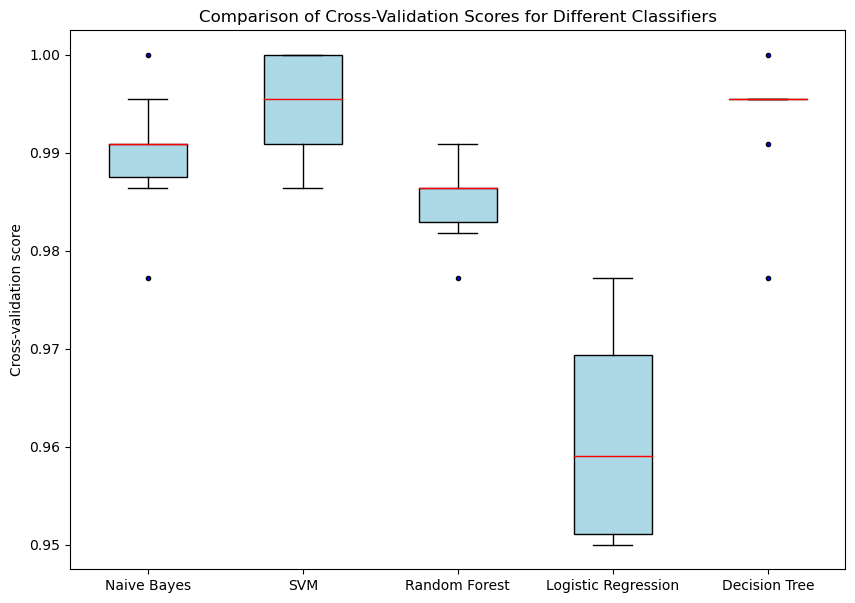

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

classifiers = [dt_clf, nb_clf, svm_clf, lr_clf, rf_clf]

scores = []
for clf in classifiers:
    cv_scores = cross_val_score(clf, X, y, cv=10)
    scores.append(cv_scores)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(scores, patch_artist=True)
plt.setp(bp['boxes'], facecolor='lightblue')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['caps'], color='black')
plt.setp(bp['medians'], color='red')
plt.setp(bp['fliers'], marker='o', markersize=3, markerfacecolor='blue')
ax.set_xticklabels(['Naive Bayes', 'SVM', 'Random Forest', 'Logistic Regression', 'Decision Tree'])
ax.set_ylabel('Cross-validation score')
ax.set_title('Comparison of Cross-Validation Scores for Different Classifiers')
plt.show()


In [11]:
classifiers = [dt_clf, nb_clf, svm_clf, lr_clf, rf_clf]
acc = [dt_acc, svm_acc, nb_acc, lr_acc, rf_acc]

# Create a dictionary that maps each classifier name to its accuracy score
accuracy_models = dict(zip(classifiers, acc))

# Print the dictionary
for k, v in accuracy_models.items():
    print (k, '==>', v)

DecisionTreeClassifier() ==> 0.9818181818181818
GaussianNB() ==> 0.9795454545454545
SVC(kernel='linear') ==> 0.9954545454545455
LogisticRegression(random_state=42) ==> 0.9454545454545454
RandomForestClassifier(random_state=42) ==> 0.9931818181818182


In [12]:
import numpy as np

# Define a single data instance to predict the crop label for
data_instance = np.array([[90, 42, 43, 23.6, 50.2, 6.8, 187.2]])

# Use the pre-trained Random Forest classifier to predict the crop label for the data instance
predicted_label = rf_clf.predict(data_instance)

# Print the predicted crop label
print("Predicted crop label:", predicted_label)

Predicted crop label: ['coffee']


In [13]:
import numpy as np

# Define a single data instance to predict the crop label for
data_instance = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])

# Use the pre-trained Random Forest classifier to predict the crop label for the data instance
predicted_label = rf_clf.predict(data_instance)

# Print the predicted crop label
print("Predicted crop label:", predicted_label)

Predicted crop label: ['jute']
